#Index
[Section 1](#scrollTo=JIVkEfvU7Dde&line=1&uniqifier=11)
>[Overview](#scrollTo=JIVkEfvU7Dde&line=1&uniqifier=1)

>[Reading in the diamonds data from the web](#scrollTo=qlSxc4u3DOW0)

>[Exploratory Data Analysis](#scrollTo=YztvnyUFFCJH&line=4&uniqifier=1)

>[How to work with Pandas Dataframe](#scrollTo=bC5T8FVLHkwU&line=3&uniqifier=1)

>[Accessing functions for a panda DataFrame](#scrollTo=e9wnbCqNISUr&line=1&uniqifier=1)

>[Defining your own functions](#scrollTo=WsbdTmNdI-Ag&line=3&uniqifier=1)

>[For loops and while loops](#scrollTo=Q0NmNyEE8RZr)

[Section 2](#scrollTo=TtoDOEbJ9Ng2&line=1&uniqifier=1)

>[Overview](#scrollTo=mojvLNXi00PP&line=6&uniqifier=1)

>[Numpy](#scrollTo=a1mX8iNM00PP)

>[Properties of NumPy arrays](#scrollTo=VC3YKUBv00PS)

>[Vectorizing functions](#scrollTo=EHpgfFmr00Pe)

>[Other ways to generate NumPy arrays](#scrollTo=iUlYU92700PU)

>[More Pandas and Matplotlib](#scrollTo=-kWFIFOS00Pi&line=1&uniqifier=1)

>[Reading in the mtcars data (CSV file) from the web](#scrollTo=BRNXy8G400Pi)

>[Exploratory Data Analysis](#scrollTo=y1J0wPf100Pl)

##Introduction to Python

## This section will discuss the following:
* Reading in a CSV file into a pandas DataFrame
* Using histograms, scatterplots and boxplots as exploratory data analysis
* Summary statistics
* Functions to access a pandas DataFrame
* Defining your own functions and using loops

#### Important: Tips for good Python Coding Practices 

1. Always comment the code, avoiding inline comments
2. Define functions to do commands that you have to do repeatedly; use docstrings when defining a function.
3. Use xrange instead of range when simply iterating a procedure N times (iterator instead of actual list built in memory).
4. Be aware of what parts of the code take the most time to run and plan accordingly (especially web requests, they tend to take a while)
5. Don't write long lines (we shouldn't have to scroll to see the whole line of code)


## Diamonds Data

This data set contains the prices and other attributes of almost 54,000 diamonds.  


Prepare the notebook for matplotlib

In [ ]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# pd.options.display.mpl_style = 'default'
plt.style.use('ggplot')

## Reading in the diamonds data (CSV file) from the web

This is a `.csv` file, so we will use the function `read_csv()` that will read in a CSV file into a pandas DataFrame. 

Pandas head() function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

For negative values of n, this function returns all rows except the last.

If n is larger than the number of rows, this function returns all rows.

If a parameter is not specified it uses 5 as default.

In [ ]:
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/diamonds.csv'
diamonds = pd.read_csv(url, sep = ',', index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Here is a table containing a description of all the column names.

Here is a table containing a description of all the column names. 

Column name | Description 
--- | --- 
carat | weight of the diamond (0.2–5.01)
cut | quality of the cut (Fair, Good, Very Good, Premium, Ideal)
colour | diamond colour, from J (worst) to D (best)
clarity | a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best))
depth | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
table | width of top of diamond relative to widest point (43–95)
price | price in US dollars (\$326–\$18,823)
x | length in mm (0–10.74)
y | width in mm (0–58.9)
z | depth in mm (0–31.8)

## Exploratory Data Analysis (EDA)

The variables `carat` and `price` are both continuous variables, while `color` and `clarity` are discrete variables. First, let's look at some summary statistics of the diamonds data set. 


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Let's look at the distribution of carats and price using a histogram.

Text(0.5, 0, 'Price')

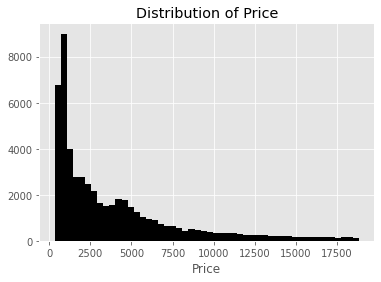

In [ ]:
diamonds['price'].hist(bins=50, color = 'black')
plt.title('Distribution of Price')
plt.xlabel('Price')

Text(0.5, 0, 'Weight in Carats')

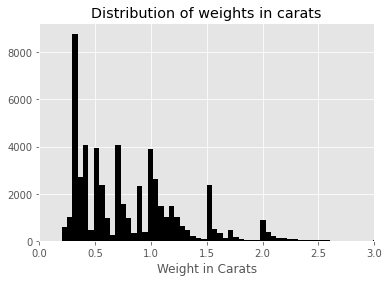

In [ ]:
# Try changing bin size from 20 to 500. What do you notice? 
diamonds['carat'].hist(bins=100, color = 'black', figsize=(6, 4))
plt.title('Distribution of weights in carats')
plt.xlim(0, 3)
plt.xlabel('Weight in Carats')

Plot the density of the price of the diamonds

Text(0.5, 1.0, 'Distribution of Price')

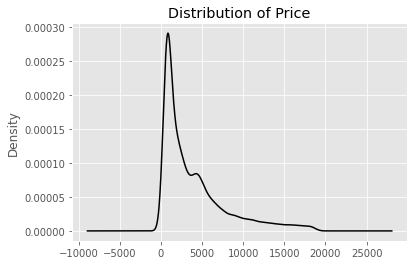

In [ ]:
diamonds['price'].plot(kind='kde', color = 'black')
plt.title('Distribution of Price')

Now, let's look at the relationship between the price of a diamond and its weight in carats. Try changing alpha (ranges from 0 to 1) to control over plotting.

<Axes: xlabel='carat', ylabel='price'>

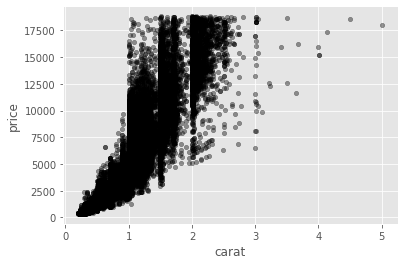

In [ ]:
diamonds.plot(x='carat', y='price', kind = 'scatter', color = 'black', alpha = 0.4)

We can also create a scatter plot using matplotlib.pyplot instead of pandas directly.

Text(0, 0.5, 'Price')

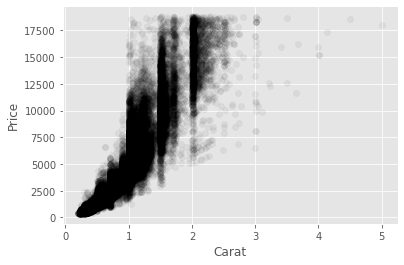

In [ ]:
plt.scatter(diamonds['carat'], diamonds['price'], color = 'black', alpha = 0.05)
plt.xlabel('Carat')
plt.ylabel('Price')

Let's look at the scatter plots of price and carat but grouped by color.



/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


color
D    Axes(0.125,0.125;0.775x0.755)
E    Axes(0.125,0.125;0.775x0.755)
F    Axes(0.125,0.125;0.775x0.755)
G    Axes(0.125,0.125;0.775x0.755)
H    Axes(0.125,0.125;0.775x0.755)
I    Axes(0.125,0.125;0.775x0.755)
J    Axes(0.125,0.125;0.775x0.755)
dtype: object

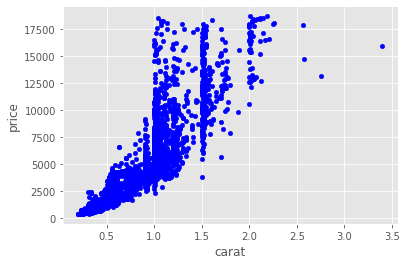

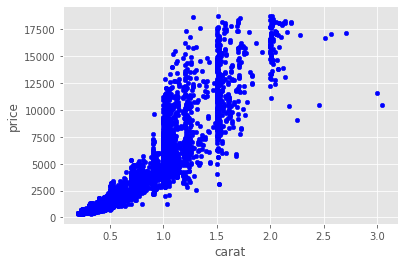

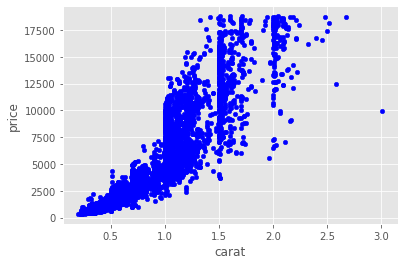

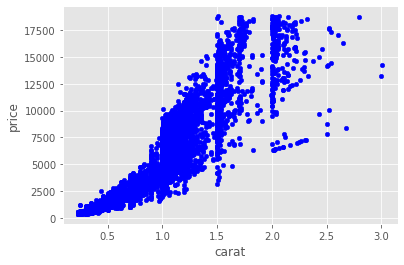

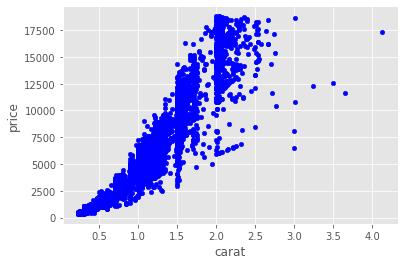

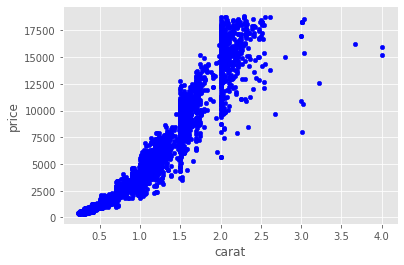

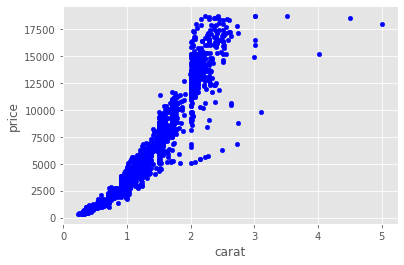

In [ ]:
diamonds.groupby('color').plot(x='carat', y='price', kind = 'scatter', color = 'blue', alpha = 1)

What happens if you look at the scatter plots of `price` and `carat` but grouped by clarity.  

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


clarity
I1      Axes(0.125,0.125;0.775x0.755)
IF      Axes(0.125,0.125;0.775x0.755)
SI1     Axes(0.125,0.125;0.775x0.755)
SI2     Axes(0.125,0.125;0.775x0.755)
VS1     Axes(0.125,0.125;0.775x0.755)
VS2     Axes(0.125,0.125;0.775x0.755)
VVS1    Axes(0.125,0.125;0.775x0.755)
VVS2    Axes(0.125,0.125;0.775x0.755)
dtype: object

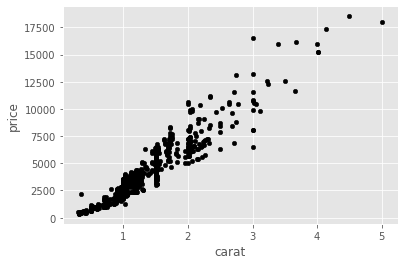

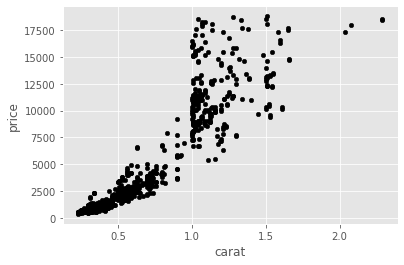

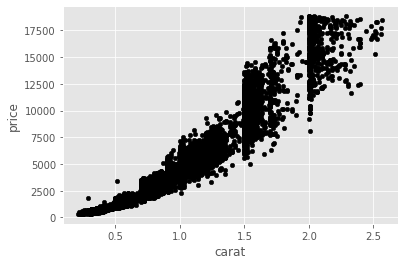

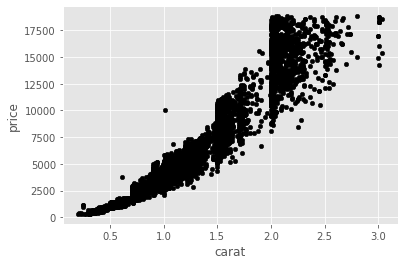

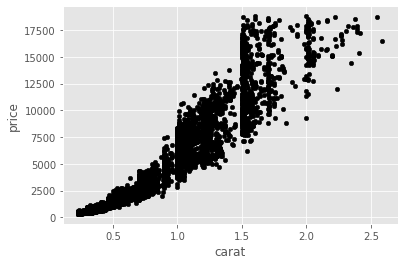

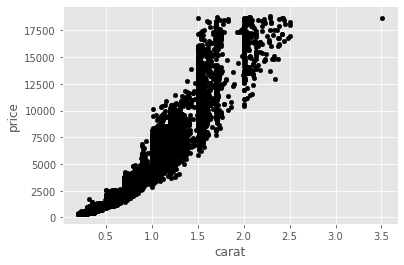

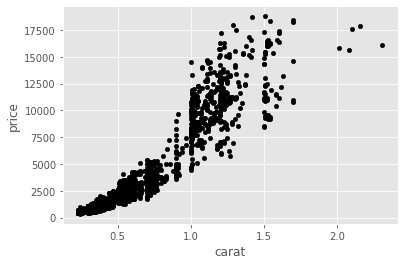

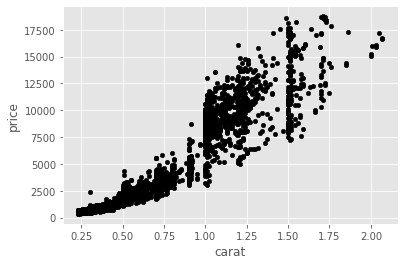

In [ ]:
# try here
diamonds.groupby('clarity').plot(x='carat', y='price', kind = 'scatter', color = 'black', alpha = 1)

We could also look at boxplots of the price grouped by color.

<Axes: title={'center': 'price'}, xlabel='color'>

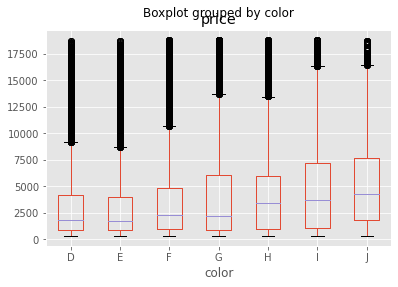

In [ ]:
diamonds.boxplot('price', by = 'color')

## More with pandas

Now that we have done some exploratory data analysis by looking at histograms, scatter plots and boxplots let's look more about how to work with the pandas DataFrame itself.  

#### More summary statistics

We just learned about `diamonds.describe()` above, what else can we do? 

In [ ]:
diamonds.mean()

<ipython-input-23-058eca819fc0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diamonds.mean()


carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [ ]:
diamonds.corr() # correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [ ]:
diamonds.var() # variance

<ipython-input-25-63a13233c3a3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  diamonds.var() # variance


carat    2.246867e-01
depth    2.052404e+00
table    4.992948e+00
price    1.591563e+07
x        1.258347e+00
y        1.304472e+00
z        4.980109e-01
dtype: float64

In [ ]:
# diamonds.sort('price', ascending = True, inplace = False).head() # sorting
diamonds.sort_index(1,'price', ascending = True, inplace = False).head() # sorting

<ipython-input-26-da526a18ca8b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  diamonds.sort_index(1,'price', ascending = True, inplace = False).head() # sorting


,carat,clarity,color,cut,depth,price,table,x,y,z
1,0.23,SI2,E,Ideal,61.5,326,55.0,3.95,3.98,2.43
2,0.21,SI1,E,Premium,59.8,326,61.0,3.89,3.84,2.31
3,0.23,VS1,E,Good,56.9,327,65.0,4.05,4.07,2.31
4,0.29,VS2,I,Premium,62.4,334,58.0,4.20,4.23,2.63
5,0.31,SI2,J,Good,63.3,335,58.0,4.34,4.35,2.75


## Accessing functions for a panda DataFrame

In [ ]:
subtable = diamonds.iloc[0:2, 0:2]
print ("subtable")
print (subtable)
print ("")

column = diamonds['color']
print ("head of the color column")
print (column.head())
print ("")

row = diamonds.index[1:2] #row 1 and 2
print ("row")
print (row)
print ("")

rows = diamonds.index[:3] # all the rows before 3
print ("rows")
print (rows)
print ("")

color = diamonds.loc[1,'color']
print ("color of diamond in row 1")
print (color)
print ("")

# max along column
print ("max price %g" % diamonds['price'].max()) 
print ("")

# axes
print ("axes")
print (diamonds.axes)
print ("")

row = diamonds.index[1]
print ("row info")
# print (row.name)
# print (row.index)
print (diamonds.keys())
print ("")

subtable
   carat      cut
1   0.23    Ideal
2   0.21  Premium

head of the color column
1    E
2    E
3    E
4    I
5    J
Name: color, dtype: object

row
Int64Index([2], dtype='int64')

rows
Int64Index([1, 2, 3], dtype='int64')

color of diamond in row 1
E

max price 18823

axes
[Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938, 53939,
            53940],
           dtype='int64', length=53940), Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')]

row info
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')



## Defining your own functions

New functions can be defined using one of the 31 keywords in Python: `def`. 

In [ ]:
def squared(x):
    """ Return the square of a  
        value """
    return x ** 2

squared(4)

16

The first line of the function (the header) must start with the keyword `def`, the name of the function (which can contain underscores), parentheses (with any arguments inside of it) and a colon.  The arguments can be specified in any order. 

The rest of the function (the body) always has an indentation of four spaces.  If you define a function in the interactive mode, the interpreter will print ellipses (...) to let you know the function isn't complete. To complete the function, enter an empty line (not necessary in a script).  

To return a value from a function, use `return`. The function will immediately terminate and not run any code written past this point.

#### The docstring
When defining new functions, you can add a `docstring` (i.e. the documentation of function) at the beginning of the function that documents what the function does. The docstring is a triple quoted (multi-line) string.  We highly recommend you to document the functions you define as good python coding practice. 

#### Lambda functions
Lambda functions are one-line functions. To define this function using the `lambda` keyword, you do not need to include the `return` argument.  For example, we can re-write the `squared()` function above using the following syntax:

In [ ]:
f = lambda x: x**2
f(4)

16

## For loops and while loops

#### For loops
Defining a `for` loop is similar to defining a new function. The header ends with a colon and the body is indented with four spaces. The function `range(n)` takes in an integer n and creates a set of values from 0 to n - 1.  `for` loops are not just for counters, but they can iterate through many types of objects such as strings, lists and dictionaries. 

In [ ]:
for i in range(4):
    print ('Hello world!')

Hello world!
Hello world!
Hello world!
Hello world!


To traverse through all characters in a given string, you can use `for` or `while` loops. Here we create the names of the duck statues in the Public Gardens in downtown Boston: Jack, Kack, Lack, Mack, Nack, Oack, Pack, Qack. 

In [ ]:
prefixes = 'JKLMNOPQ'
suffix = 'ack'
for letter in prefixes:
    print (letter + suffix)

Jack
Kack
Lack
Mack
Nack
Oack
Pack
Qack


#### while loops
Defining a `while` loop is again similar to defining a `for` loop or new function. The header ends with a colon and the body is indented with four spaces. 

In [ ]:
def countdown(n):
    while n > 0:
        print (n)
        n = n-1
    print ('Blastoff!')

countdown(3)

3
2
1
Blastoff!


#### List comprehensions
Another powerful feature of Python is **list comprehension** which maps one list onto another list and applying a function to each element.  Here, we take each element in the list `a` (temporarily assigning it the value i) and square each element in the list. This creates a new list and does not modify `a`.  In the second line, we can add a conditional statements of only squaring the elements if the element is not equal to 10.

In [ ]:
a = [5, 10, 15, 20]
b = [i**2 for i in a]
c = [i**2 for i in a if i != 10]

print ("a: ", a)
print ("b: ", b)
print ("c: ", c)

a:  [5, 10, 15, 20]
b:  [25, 100, 225, 400]
c:  [25, 225, 400]


#**SECTION 2**

## This section will discuss the following:
* Brief introduction to Numpy, Scipy
    * Vectorizing functions
* More pandas and matplotlib
* Working in the command line
* Overview of git and Github


# Numpy

NumPy and SciPy are modules in Python for scientific computing.  [NumPy](http://www.numpy.org) lets you do fast, vectorized operations on arrays.  Why use this module?  

* It gives you the performance of using low-level code (e.g. C or Fortran) with the benefit of writing the code in an interpreted scripting language (all while keeping the native Python code). 
* It gives you a fast, memory-efficient multidimensional array called `ndarray` which allows you perform vectorized operations on (and supports mathematical functions such as linear algebra and random number generation)

In [ ]:
# Import NumPy
import numpy as np

To create a fast, multidimensional `ndarray` object, use the `np.array()` method on a python `list` or `tuple` or reading data from files. 

In [ ]:
x = np.array([1,2,3,4])
y = np.array([[1,2], [3,4]])
x

array([1, 2, 3, 4])

In [ ]:
y

array([[1, 2],
       [3, 4]])

In [ ]:
type(x)

numpy.ndarray

#### Properties of NumPy arrays
There are a set of properties about the `ndarray` object such the dimensions, the size, etc.  

Property | Description
--- | ----
`y.shape` (or `shape(y)` | Shape or dimension of the array
`y.size` (or `size(y)`) | Number of elements in the array 
`y.ndim` | number of dimensions 


In [ ]:
x.shape

(4,)

In [ ]:
y.shape

(2, 2)

#### Other ways to generate NumPy arrays

Function | Description
--- | ---
`np.arange(start,stop,step)` | Create a range between the start and stop arguments
`np.linspace(start,stop,num)` | Create a range between start and stop (both ends included) of length num
`np.logspace(start, stop,num,base)` | Create a range in the log space with a define base of length num
`np.eye(n)` | Generate an n x n identity matrix

In [ ]:
np.arange(0, 21, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [ ]:
# Try it: Create a numpy array from 0 to 20 in steps of size 2
np.arange(0, 22, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [ ]:
# Try it: Create a numpy array from -10 to 10 in steps of 0.5 (INCLUDING the number 10)
np.arange(-10, 10.5, 0.5)

array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5,  10. ])

In [ ]:
# Try it: Create a numpy array from 100 to 1000 of length 10
np.linspace(100,1000,10)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In addition, the `numpy.random` module can be used to create arrays using a random number generation 

In [ ]:
from numpy import random

Function | Description
--- | ---
`np.random.randint(a, b, N)` | Generate N random integers between a and b
`np.random.rand(n, m)` | Generate uniform random numbers in [0,1] of dim n x m
`np.random.randn(n, m)` | Generate standard normal random numbers of dim n x m


In [ ]:
np.random.randint(1, 100, 50)

array([36,  3, 71,  2, 62, 69, 33, 46, 53, 71,  3, 14, 67, 22, 65,  7,  7,
       95, 65,  6, 92, 13, 22, 29,  9, 20, 42, 67, 23, 59,  9, 97, 30, 79,
       21, 62, 33, 74, 96, 93,  1, 28, 21, 51, 32, 69, 22, 36, 59, 56])

In [ ]:
# Try it: Create a numpy array filled with random samples 
# from a normal distribution of size 4 x 4
np.random.rand(4,4)

array([[0.97882286, 0.55595961, 0.44777496, 0.99312834],
       [0.65158043, 0.37629869, 0.88694755, 0.2056611 ],
       [0.43545995, 0.14819281, 0.67884302, 0.05624396],
       [0.25491725, 0.99039279, 0.9984617 , 0.647841  ]])

#### Reshaping, resizing and stacking NumPy arrays

To reshape an array, use `reshape()`:

In [ ]:
z = np.random.rand(4,4)
z 

array([[0.01086417, 0.39405634, 0.48784263, 0.64500851],
       [0.86522137, 0.97704708, 0.22321322, 0.53208177],
       [0.8429053 , 0.17961303, 0.11638697, 0.87169602],
       [0.80183125, 0.72947676, 0.64953183, 0.01526807]])

In [ ]:
z.shape

(4, 4)

In [ ]:
z.reshape((8,2)) # dim is now 8 x 2

array([[0.01086417, 0.39405634],
       [0.48784263, 0.64500851],
       [0.86522137, 0.97704708],
       [0.22321322, 0.53208177],
       [0.8429053 , 0.17961303],
       [0.11638697, 0.87169602],
       [0.80183125, 0.72947676],
       [0.64953183, 0.01526807]])

To flatten an array (convert a higher dimensional array into a vector), use `flatten()`

In [ ]:
z.flatten()

array([0.01086417, 0.39405634, 0.48784263, 0.64500851, 0.86522137,
       0.97704708, 0.22321322, 0.53208177, 0.8429053 , 0.17961303,
       0.11638697, 0.87169602, 0.80183125, 0.72947676, 0.64953183,
       0.01526807])

## Operating on NumPy arrays

#### Assigning values
To assign values to a specific element in a `ndarray`, use the assignment operator. 

In [ ]:
y = np.array([[1,2], [3,4]])
y.shape

(2, 2)

In [ ]:
y[0,0] = 10
y 

array([[10,  2],
       [ 3,  4]])

#### Indexing and slicing arrays
To extract elements of the NumPy arrays, use the bracket operator and the slice (i.e. colon) operator.  To slice specific elements in the array, use `dat[lower:upper:step]`. To extract the diagonal (and subdiagonal) elements, use `diag()`. 

In [ ]:
 # random samples from a uniform distribution between 0 and 1
dat = np.random.rand(4,4)
dat

array([[0.02734851, 0.49743219, 0.34260984, 0.25774721],
       [0.07759834, 0.67201815, 0.49376503, 0.42244862],
       [0.89420144, 0.81108384, 0.80190194, 0.5180364 ],
       [0.77374284, 0.31875362, 0.95109575, 0.7209553 ]])

In [ ]:
dat[0, :] # row 1

array([0.02734851, 0.49743219, 0.34260984, 0.25774721])

In [ ]:
dat[:, 0] # column 1

array([0.02734851, 0.07759834, 0.89420144, 0.77374284])

In [ ]:
dat[0:3:2, 0] # first and third elements in column 1

array([0.02734851, 0.89420144])

In [ ]:
np.diag(dat) # diagonal

array([0.02734851, 0.67201815, 0.80190194, 0.7209553 ])

In [ ]:
np.arange(32).reshape((8, 4)) # returns an 8 x 4 array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
x[0] # returns the first row

1

#### Element-wise transformations on arrays
There are many vectorized wrappers that take in one scalar and produce one ore more scalars (e.g. `np.exp()`, `np.sqrt()`). This element-wise array methods are also known as NumPy `ufuncs`. 

Function | Description 
--- | --- 
`np.abs(x)` | absolute value of each element
`np.sqrt(x)` | square root of each element
`np.square(x)` | square of each element
`np.exp(x)` | exponential of each element
`np.maximum(x, y)` | element-wise maximum from two arrays x and y
`np.minimum(x,y)` | element-wise minimum
`np.sign(x)` | compute the sign of each element: 1 (pos), 0 (zero), -1 (neg)
`np.subtract(x, y)` | subtract elements in y from elements in x
`np.power(x, y)` | raise elements in first array x to powers in second array y
`np.where(cond, x, y)` | ifelse statement



## Vectorizing functions

It is important to state again that you should avoid looping through elements in vectors if at all possible.  One way to get around that when writing functions is to use what are called **vectorized functions**.  Say you wrote a function `f` which accepts some input `x` and checks if `x` is bigger or smaller than 0.  


In [ ]:
def f(x):
    if x >=0:
        return True
    else:
        return False

print (f(3))

True


If we give the function an array instead of just one value (e.g. 3), then Python will give an error because there is more than one element in `x`.  The way to get around this is to **vectorize** the function.  

In [ ]:
f_vec = np.vectorize(f)
z = np.arange(-5, 6)
z 

NameError: ignored

In [ ]:
f_vec(z)

NameError: ignored

Instead of vectorizing the function, you can also make the function itself aware that it will be accepting vectors from the beginning. 

In [ ]:
def f(x):
    return (x >=0)

print (f(3))
print (f(z))

True
[False False False False False  True  True  True  True  True  True]


## Scipy

Now that you know a little bit about [NumPy](numpy.html) and SciPy is a collection of mathematical and scientific modules built on top of NumPy.  For example, SciPy can handle multidimensional arrays, integration, linear algebra, statistics and optimization.  

In [ ]:
# Import SciPy
import scipy

SciPy includes most of NumPy, so importing SciPy should be generally OK. The main SciPy module is made up of many [submodules containing specialized topics](http://docs.scipy.org/doc/scipy/reference/). 

Favorite SciPy submodules | What does it contain? 
--- | --- 
`scipy.stats` | [statistics](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats): random variables, probability density functions, cumulative distribution functions, survival functions
`scipy.integrate` | [integration](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate): single, double, triple integration, trapezoidal rule, Simpson's rule, differential equation solvers
`scipy.signal` | [signal processing tools](https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal): signal processing tools such as wavelets, spectral densities, filters, B-splines
`scipy.optimize` | [optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize): find roots, curve fitting, least squares, etc 
`scipy.special` | [special functions](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special): very specialized functions in mathematical physics e.g. bessel, gamma
`scipy.linalg` | [linear algebra](https://docs.scipy.org/doc/scipy/reference/linalg.html#module-scipy.linalg): inverse of a matrix, determinant, Kronecker product, eigenvalue decomposition, SVD, functions for matrices (beyond those in `numpy.linalg`)

If you want to import a SciPy submodule (e.g. the statistics submodule `scipy.stats`), use 

In [ ]:
from scipy import stats

#### scipy.stats 
Let's dive a bit deeper in `scipy.stats`. The real utility of this submodule is to access probability distributions functions (pdfs) and standard statistical tests (e.g. $t$-test).  

#### Probability distribution functions
There is a large collection of [continuous and discrete pdfs](http://docs.scipy.org/doc/scipy/reference/stats.html) in the `scipy.stats` submodule.  The syntax to simulate random variables from a specific pdf is the name of the distribution  followed by `.rvs`. To generate $n$=10 $N(0,1)$ random variables, 

Text(0.5, 1.0, 'Histogram of 1000 normal random variables')

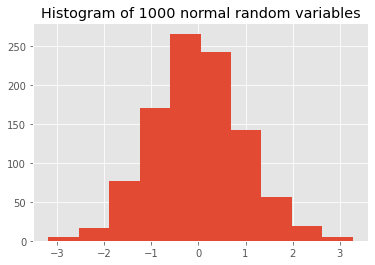

In [ ]:
from scipy.stats import norm
x = norm.rvs(loc = 0, scale = 1, size = 1000)
plt.hist(x)
plt.title('Histogram of 1000 normal random variables')

# More Pandas and Matplotlib

## Motor Trend Car Road Tests Data

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). This dataset is available on Github in the [2014_data repository](https://github.com/cs109/2014_data) and is called `mtcars.csv`. 

## Reading in the mtcars data (CSV file) from the web

This is a `.csv` file, so we will use the function `read_csv()` that will read in a CSV file into a pandas DataFrame. 

In [ ]:
url = 'https://raw.githubusercontent.com/cs109/2014_data/master/mtcars.csv'
mtcars = pd.read_csv(url, sep = ',', index_col=0)
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# DataFrame with 32 observations on 11 variables
mtcars.shape 

(32, 11)

In [ ]:
# return the column names
mtcars.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

Here is a table containing a description of all the column names. 

Column name | Description 
--- | --- 
mpg | Miles/(US) gallon
cyl | Number of cylinders
disp | Displacement (cu.in.)
hp | Gross horsepower
drat | Rear axle ratio
wt | Weight (lb/1000)
qsec | 1/4 mile time
vs | V/S
am | Transmission (0 = automatic, 1 = manual)
gear | Number of forward gears
carb | Number of carburetors


In [ ]:
# return the actual data inside the panadas data frame
mtcars.values

array([[ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.62 ,  16.46 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 21.   ,   6.   , 160.   , 110.   ,   3.9  ,   2.875,  17.02 ,
          0.   ,   1.   ,   4.   ,   4.   ],
       [ 22.8  ,   4.   , 108.   ,  93.   ,   3.85 ,   2.32 ,  18.61 ,
          1.   ,   1.   ,   4.   ,   1.   ],
       [ 21.4  ,   6.   , 258.   , 110.   ,   3.08 ,   3.215,  19.44 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 18.7  ,   8.   , 360.   , 175.   ,   3.15 ,   3.44 ,  17.02 ,
          0.   ,   0.   ,   3.   ,   2.   ],
       [ 18.1  ,   6.   , 225.   , 105.   ,   2.76 ,   3.46 ,  20.22 ,
          1.   ,   0.   ,   3.   ,   1.   ],
       [ 14.3  ,   8.   , 360.   , 245.   ,   3.21 ,   3.57 ,  15.84 ,
          0.   ,   0.   ,   3.   ,   4.   ],
       [ 24.4  ,   4.   , 146.7  ,  62.   ,   3.69 ,   3.19 ,  20.   ,
          1.   ,   0.   ,   4.   ,   2.   ],
       [ 22.8  ,   4.   , 140.8  ,  95.   ,   3.92 ,   3.15 ,  22.9  ,
 

In [ ]:
mtcars[25:] # rows 25 to end of data frame

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.9,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2
Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [ ]:
# return index
mtcars.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object')

In [ ]:
mtcars.loc['Maserati Bora'] # access a row by an index

mpg      15.00
cyl       8.00
disp    301.00
hp      335.00
drat      3.54
wt        3.57
qsec     14.60
vs        0.00
am        1.00
gear      5.00
carb      8.00
Name: Maserati Bora, dtype: float64

In [ ]:
# What other methods are available when working with pandas DataFrames?
# type 'mtcars.' and then click <TAB>
# mtcars.<TAB>

# try it here



SyntaxError: ignored

## Exploratory Data Analysis (EDA)

Even though they may look like continuous variabes, `cyl`, `vs`, `am`, `gear` and `carb` are integer or categorical variables. First, let's look at some summary statistics of the mtcars data set. 

In [ ]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


#### Using conditional statements

To check if `any` or `all` elements in an array meet a certain criteria, use `any()` and `all()`. 

In [ ]:
(mtcars.mpg >= 20).any()

True

In [ ]:
(mtcars > 0).all()

mpg      True
cyl      True
disp     True
hp       True
drat     True
wt       True
qsec     True
vs      False
am      False
gear     True
carb     True
dtype: bool

Let's look at the distribution of `mpg` using a histogram.

Text(0.5, 0, 'Miles Per Gallon')

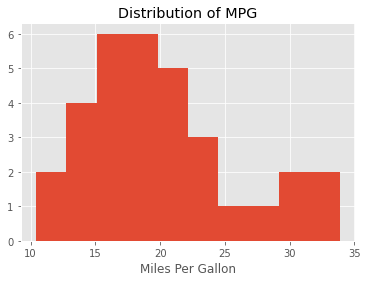

In [ ]:
mtcars['mpg'].hist()
plt.title('Distribution of MPG')
plt.xlabel('Miles Per Gallon')

Text(0.5, 1.0, 'Relationship between cylinders and MPG')

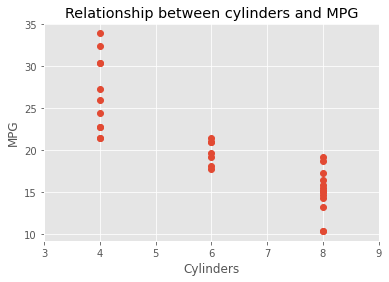

In [ ]:
# Relationship between cyl and mpg
plt.plot(mtcars.cyl, mtcars.mpg, 'o')
plt.xlim(3, 9)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('Relationship between cylinders and MPG')

Text(0.5, 1.0, 'Relationship between horsepower and MPG')

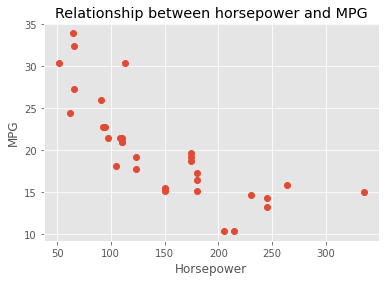

In [ ]:
# Relationship between horsepower and mpg
plt.plot(mtcars.hp, mtcars.mpg, 'o')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Relationship between horsepower and MPG')

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='hp', ylabel='mpg'>,
        <Axes: xlabel='cyl', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='hp'>,
        <Axes: xlabel='hp', ylabel='hp'>,
        <Axes: xlabel='cyl', ylabel='hp'>],
       [<Axes: xlabel='mpg', ylabel='cyl'>,
        <Axes: xlabel='hp', ylabel='cyl'>,
        <Axes: xlabel='cyl', ylabel='cyl'>]], dtype=object)

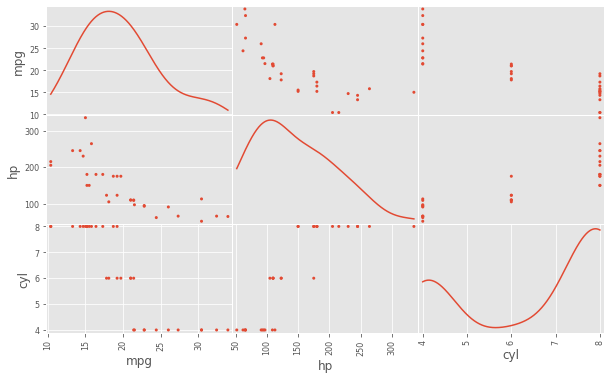

In [ ]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
scatter_matrix(mtcars[['mpg', 'hp', 'cyl']], 
               figsize = (10, 6), alpha = 1, diagonal='kde')

#Fuentes

* Este contenido fue tomado del curso CS109 Data Science - Harvard School of Engineering and Applied Sciences
<a href=http://cs109.github.io/2014/>CS109 Data Science - 2014</a>

* Adaptaciones menores hechas para nuestro curso.


* <a href=https://raw.githubusercontent.com/cs109/2014/master/labs/Lab2_Notes.ipynb download=HW1.ipynb> El notebook original puede ser descargado en Github </a>